<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/Tensorflow_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Feb 24 21:22:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

Uninstalling tb-nightly-2.2.0a20200224:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tb_nightly-2.2.0a20200224.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tb-nightly-2.2.0a20200224
  Using cached https://files.pythonhosted.org/packages/a2/70/a4867bf086f6c1826da3998c9f0c6242eb04845aba384a2dd9cfaaabac4a/tb_nightly-2.2.0a20200224-py3-none-any.whl


In [ ]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
    print(entry_point.dist)

tensorboard-plugin-wit 1.6.0.post2
tb-nightly 2.2.0a20200224


In [ ]:
#!ls -alrt /usr/local/lib/python3.6/dist-packages/tensorboard*
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

rm: cannot remove '/usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info': No such file or directory


In [ ]:
print(tf.__version__)

2.2.0-dev20200218


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset = dataset['train']

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteR44MXI/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [ ]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [ ]:
len(list(train_dataset))

104975

In [ ]:
BUFFER_SIZE = 40000
BATCH_SIZE = 196

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [ ]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'1725988'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B004BJT75U'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'662015355'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Van Gogh - Blossoming Almond Tree Design iPod classic 80GB/ 120GB Protector Skin Decal Sticker'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b"This. Is. Amazing!! So it arrived on time, actually earlier than expected, and it makes my iPod classic look so beautiful!! I can't stop staring at it! Applying it wasn't the easiest since U was trying to make it PERFECT, but it's not hard either! But once you apply it it's all worth it. 10/10.">, 'review_date': <tf.Tensor: shape=(), dtype=

In [ ]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b"This. Is. Amazing!! So it arrived on time, actually earlier than expected, and it makes my iPod classic look so beautiful!! I can't stop staring at it! Applying it wasn't the easiest since U was trying to make it PERFECT, but it's not hard either! But once you apply it it's all worth it. 10/10."
tf.Tensor(5, shape=(), dtype=int32)
1
b'I bought these to use for swimming and running and I really love them.  Sound is great and they stay in p[lace perfectly.  They block out so much outside sound that I often run with just one so I can talk to my running buddies.  Great product.'
tf.Tensor(5, shape=(), dtype=int32)
1
b'The case for my Nook was exactly what I wanted...the quality is top-notch, the leather is a beautiful color and the price was less that half of what I was asked to pay at a store....even when tax and shipping are included. I am very pleased with this purchase.........CeCe'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Loved it'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Worked great

In [ ]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for _, reviews in train_dataset.enumerate():
  #print(reviews)
  review_text=reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [ ]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set, lowercase=True, strip_vocab=True)

In [ ]:
print(vocabulary_set)

{'voiceovers', 'Q1200', 'Passport', 'Runescape', 'vid', 'happenes', '201', 'bye', 'lighr', 'ojo', 'flips', 'bluethooth', 'c15', '20x25', 'bday', 'ba', 'kidloves', 'TAGG', 'UWaterG2', 'Vegas', 'ala', 'MVCI', 'philps', 'iLink', 'period', 'AUTHOR', 'midstep', 'B003UOMCOU', 'GPSlim', 'mustered', 'KIV', 'pockeet', 'MEGALLAN', 'slovenly', 'Eliminator', 'Estoy', 'excellently', 'FMOD', 'MapCreate', 'wifey', 'turning', 'friedly', 'accepts', 'jokes', 'brooklyn', 'sensive', 'solitary', 'kleptos', 'Amberella', 'roped', 'Dacalrus', 'boombox', 'each', 'Fidelio', 'consice', 'Arc', 'makezine', 'meg', 'stewardesses', 'toutch', 'Woche', 'outskirts', 'Yellowed', 'YuanDao', 'fay', 'Infinitis', 'reflective', 'G70', 'CALIBRATION', 'slipcovers', 'Linked', 'd53d4c100607c54dc05c3c31d790835c', 'pcmcia', 'lod', 'BRAD', '20gb', 'bead', 'fanfare', 'grouping', 'tid', 'suiting', 'cabel', 'unofficial', 'costo', 'EXISTENT', 'megaphone', '108MHz', '60w', 'doller', 'faintest', 'conveyed', 'lhasa', 'transformed', 'dimmed

In [ ]:
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b"This. Is. Amazing!! So it arrived on time, actually earlier than expected, and it makes my iPod classic look so beautiful!! I can't stop staring at it! Applying it wasn't the easiest since U was trying to make it PERFECT, but it's not hard either! But once you apply it it's all worth it. 10/10."
[62013, 38917, 50991, 63915, 72278, 41151, 71419, 49207, 41495, 66777, 71586, 73145, 66915, 72278, 47503, 66300, 67032, 59188, 46916, 63915, 57757, 71435, 62514, 45643, 39508, 62564, 21485, 72278, 55559, 72278, 59340, 45643, 59919, 26131, 55462, 62361, 66796, 60308, 38681, 65632, 72278, 44831, 70253, 72278, 55404, 66386, 44951, 64289, 70253, 67954, 62262, 71226, 72278, 72278, 55404, 57783, 37567, 72278, 34434, 34434]
b'I bought these to use for swimming and running and I really love them.  Sound is great and they stay in p[lace perfectly.  They block out so much outside sound that I often run with just one so I can talk to my running buddies.  Great product.'
[71435, 72439, 70103, 38681, 5467

In [ ]:
for index in encoded_example:
  print('{} ----> {}'.format(index, encoder.decode([index])))

13351 ----> worked
70302 ----> great
71435 ----> i
49133 ----> would
33906 ----> absolutely
64801 ----> recommend
62013 ----> this
68174 ----> product
66915 ----> and
67600 ----> plan
38681 ----> to
70485 ----> buy
72278 ----> it
62159 ----> again
56396 ----> myself
65434 ----> when
50416 ----> needed
19013 ----> in
59919 ----> the
45586 ----> future


In [ ]:
encoder.save_to_file("/tmp/sa_encoder.vocab")

In [ ]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

In [ ]:
def encode_map_fn(tensor):
  
  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating') 

  encoded_text, label = tf.py_function(encode, 
                                       inp=[text, label], 
                                       Tout=(tf.int64, tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [ ]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [ ]:
for f0,f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)

tf.Tensor(
[62013 38917 50991 63915 72278 41151 71419 49207 41495 66777 71586 73145
 66915 72278 47503 66300 67032 59188 46916 63915 57757 71435 62514 45643
 39508 62564 21485 72278 55559 72278 59340 45643 59919 26131 55462 62361
 66796 60308 38681 65632 72278 44831 70253 72278 55404 66386 44951 64289
 70253 67954 62262 71226 72278 72278 55404 57783 37567 72278 34434 34434], shape=(60,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[71435 72439 70103 38681 54673 69997 36179 66915 66218 66915 71435 70298
 71151 11092 35753 38917 70302 66915 65483 52371 19013 68620 45893 53237
 65483 59147 55179 63915 30607 60084 35753 70102 71435 62623 26901 72639
 35223 62833 63915 71435 62514 50040 38681 66300 66218 67245 70302 68174], shape=(48,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
TAKE_SIZE=14000

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [ ]:
vocab_size += 1

In [ ]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]



(<tf.Tensor: shape=(847,), dtype=int64, numpy=
 array([62013, 38917, 50991, 63915, 72278, 41151, 71419, 49207, 41495,
        66777, 71586, 73145, 66915, 72278, 47503, 66300, 67032, 59188,
        46916, 63915, 57757, 71435, 62514, 45643, 39508, 62564, 21485,
        72278, 55559, 72278, 59340, 45643, 59919, 26131, 55462, 62361,
        66796, 60308, 38681, 65632, 72278, 44831, 70253, 72278, 55404,
        66386, 44951, 64289, 70253, 67954, 62262, 71226, 72278, 72278,
        55404, 57783, 37567, 72278, 34434, 34434,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [ ]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[134  62]
[ 75 121]
[119  77]
[135  61]
[132  64]
[144  52]
[ 75 121]
[127  69]
[127  69]
[130  66]


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64, 32, 16]:
  model.add(tf.keras.layers.Dense(units, activation='relu'))
  model.add(tf.keras.layers.Dropout(units*0.006))
model.add(tf.keras.layers.Dense(1))


In [ ]:
!rm -r /tmp/logs/

In [ ]:
logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/sentiment_analysis.hdf5', verbose=1, save_best_only=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_data, epochs=6, validation_data=test_data, callbacks=[tensorboard_callback,checkpointer])

Epoch 1/6
    465/Unknown - 239s 514ms/step - loss: 0.3650 - accuracy: 0.8263
Epoch 00001: val_loss improved from inf to 0.32376, saving model to /tmp/sentiment_analysis.hdf5
465/465 [==============================] - 261s 561ms/step - loss: 0.3650 - accuracy: 0.8263 - val_loss: 0.3238 - val_accuracy: 0.8639
Epoch 2/6
464/465 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.8969
Epoch 00002: val_loss improved from 0.32376 to 0.28821, saving model to /tmp/sentiment_analysis.hdf5
465/465 [==============================] - 256s 551ms/step - loss: 0.2542 - accuracy: 0.8969 - val_loss: 0.2882 - val_accuracy: 0.8796
Epoch 3/6
464/465 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9146
Epoch 00003: val_loss improved from 0.28821 to 0.28588, saving model to /tmp/sentiment_analysis.hdf5
465/465 [==============================] - 253s 545ms/step - loss: 0.2186 - accuracy: 0.9146 - val_loss: 0.2859 - val_accuracy: 0.8858
Epoch 4/6
464/465 [=========

In [ ]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [ ]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118625184 Feb 24 22:37 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 118625184 Feb 24 22:51 /tmp/final_sentiment_analysis.hdf5


In [ ]:
eval_loss, eval_acc = model.evaluate(test_data)

print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

     72/Unknown - 20s 284ms/step - loss: 0.3292 - accuracy: 0.8807
Eval loss: 0.329, Eval accuracy: 0.881


In [ ]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))


tf.Tensor(
[1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 0 0 0 1 1 0 1 1], shape=(196,), dtype=int32)
[[ 7.495976  ]
 [ 7.029666  ]
 [ 7.165345  ]
 [ 3.041151  ]
 [ 7.3181715 ]
 [ 7.882741  ]
 [ 7.4492493 ]
 [-6.6606913 ]
 [-7.8830442 ]
 [ 7.39373   ]
 [ 3.0437136 ]
 [-4.6626296 ]
 [ 5.3866115 ]
 [-4.9347215 ]
 [ 7.2289596 ]
 [-6.1002197 ]
 [ 7.70189   ]
 [-6.053842  ]
 [ 7.2251835 ]
 [ 4.559285  ]
 [-0.03752804]
 [-5.4026113 ]
 [ 2.4705436 ]
 [ 4.1706076 ]
 [ 5.380473  ]
 [ 7.327431  ]
 [ 1.6872168 ]
 [ 3.7911913 ]
 [-8.867253  ]
 [ 3.6289697 ]
 [-4.7485714 ]
 [ 5.937135  ]
 [ 7.5449977 ]
 [ 6.58335   ]
 [-1.1908131 ]
 [ 4.802243  ]
 [-8.876009  ]
 [-6.66

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         9438720   
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)               

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.get_layer('embedding').output

In [ ]:
!nvidia-smi

Mon Feb 24 22:51:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    49W / 250W |  15821MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

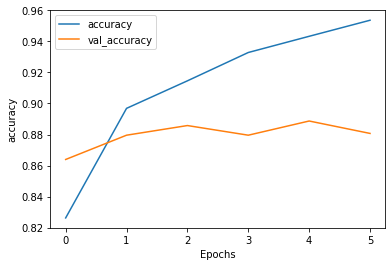

In [ ]:
plot_graphs(history, 'accuracy')

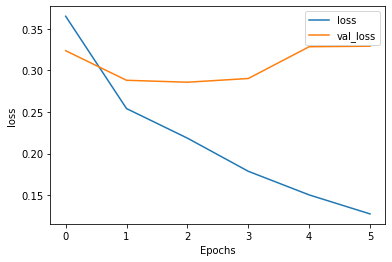

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
tf.keras.backend.clear_session()
#sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5',compile = False)
sa_load = tf.keras.models.load_model('/tmp/final_sentiment_analysis.hdf5',compile = False)

In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))

  return (predictions)

In [ ]:
pred_text = ('This watch is pretty bad. Color and dial looks pathetic.')
predictions = predict_fn(pred_text)
print(predictions)

[62013, 51282, 38917, 68710, 69160, 28828, 66915, 55557, 73162, 48013]
[62013, 51282, 38917, 68710, 69160, 28828, 66915, 55557, 73162, 48013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-2.850278]]


In [ ]:
pred_text = ('Color and dial does not look as advertised. Shipping was not any better as well')
predictions = predict_fn(pred_text)
print(predictions)

[28828, 66915, 55557, 32128, 66386, 46916, 45668, 55124, 53575, 66796, 66386, 56910, 51246, 45668, 64743]
[28828, 66915, 55557, 32128, 66386, 46916, 45668, 55124, 53575, 66796, 66386, 56910, 51246, 45668, 64743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-4.2995567]]


In [ ]:
pred_text = ('Amazing product. Fast Delivery. Nice packing')
predictions = predict_fn(pred_text)
print(predictions)

[50991, 68174, 69456, 39257, 36290, 21937]
[50991, 68174, 69456, 39257, 36290, 21937, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[7.0540037]]


In [ ]:
pred_text = ('Nice product. Packing could have been better')
predictions = predict_fn(pred_text)
print(predictions)

[36290, 68174, 21937, 68249, 72731, 72584, 51246]
[36290, 68174, 21937, 68249, 72731, 72584, 51246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.6154106]]


In [ ]:
print(tf.distribute.get_strategy())

In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir /tmp/logs

In [ ]:
from tensorboard import notebook
notebook.list()

In [ ]:
notebook.display(port=6006, height=1000) 